#### Import Libraries

In [4]:
import shutil
import random
import math
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import pandas as pd

#### Datasets

In [5]:
base_dir = "datasets"

print("Train (Cat):", len(os.listdir(os.path.join(base_dir, "train/cat"))))
print("Train (Dog):", len(os.listdir(os.path.join(base_dir, "train/dog"))))

print("Train after Augmentation (Cat):", len(os.listdir(os.path.join(base_dir, "train_aug/cat"))))
print("Train after Augmentation (Dog):", len(os.listdir(os.path.join(base_dir, "train_aug/dog"))))

print("Val (Cat):", len(os.listdir(os.path.join(base_dir, "val/cat"))))
print("Val (Dog):", len(os.listdir(os.path.join(base_dir, "val/dog"))))

print("Test:", len(os.listdir(os.path.join(base_dir, "test"))))

Train (Cat): 10000
Train (Dog): 10000
Train after Augmentation (Cat): 20000
Train after Augmentation (Dog): 20000
Val (Cat): 2500
Val (Dog): 2500
Test: 500


In [6]:
img_height, img_width = 128, 128
batch_size = 32
train_dir = "./datasets"

train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(train_dir, "train_aug"),
    image_size = (img_height, img_width),
    batch_size = batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(train_dir, "val"),
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 40000 files belonging to 2 classes.


2022-11-13 07:25:03.645398: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-13 07:25:07.121230: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22290 MB memory:  -> device: 0, name: GeForce RTX 3090, pci bus id: 0000:19:00.0, compute capability: 8.6
2022-11-13 07:25:07.129157: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22290 MB memory:  -> device: 1, name: GeForce RTX 3090, pci bus id: 0000:1a:00.0, compute capability: 8.6
2022-11-13 07:25:07.144014: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/t

Found 5000 files belonging to 2 classes.


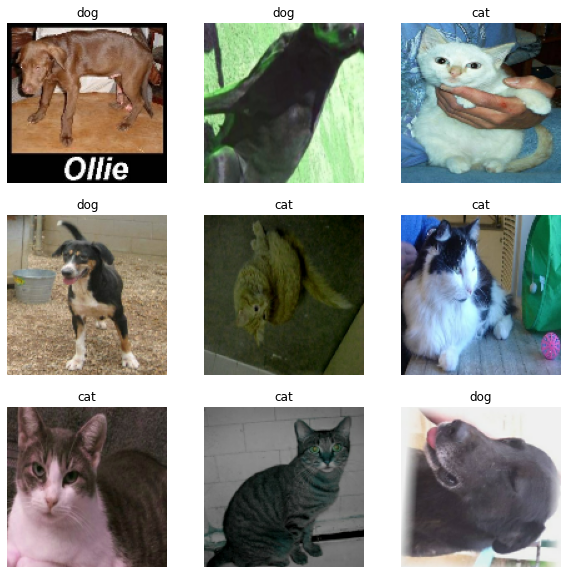

In [7]:
class_names = ["cat", "dog"]
plt.figure(figsize=(10,10))

# get a batch of batch_size
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8")) # displaying image
        plt.title(class_names[labels[i]])
        plt.axis("off")

#### CNN Model 

In [9]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.applications.ResNet50(include_top=False, pooling='max', weights='imagenet'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

earlyStopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, verbose=1)

In [10]:
EPOCHS = 50

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs = EPOCHS,
    callbacks=[earlyStopping]
)

Epoch 1/50


2022-11-13 07:25:28.021056: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-11-13 07:25:28.707772: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2022-11-13 07:25:28.719443: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.6
2022-11-13 07:25:28.719476: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2022-11-13 07:25:28.719598: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be 

1250/1250 [==============================] - 71s 49ms/step - loss: 1.0842 - accuracy: 0.6034 - val_loss: 117.4943 - val_accuracy: 0.5306
Epoch 2/50
1250/1250 [==============================] - 59s 47ms/step - loss: 0.8661 - accuracy: 0.5745 - val_loss: 0.6552 - val_accuracy: 0.6036
Epoch 3/50
1250/1250 [==============================] - 59s 47ms/step - loss: 0.7810 - accuracy: 0.5970 - val_loss: 0.6281 - val_accuracy: 0.6512
Epoch 4/50
1250/1250 [==============================] - 59s 47ms/step - loss: 0.7624 - accuracy: 0.5968 - val_loss: 0.6677 - val_accuracy: 0.5982
Epoch 5/50
1250/1250 [==============================] - 59s 47ms/step - loss: 0.7416 - accuracy: 0.5911 - val_loss: 0.6714 - val_accuracy: 0.6024
Epoch 6/50
1250/1250 [==============================] - 59s 47ms/step - loss: 0.7066 - accuracy: 0.6078 - val_loss: 0.7518 - val_accuracy: 0.5488
Epoch 7/50
1250/1250 [==============================] - 59s 47ms/step - loss: 0.6641 - accuracy: 0.6220 - val_loss: 0.6580 - val_accu

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_1 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


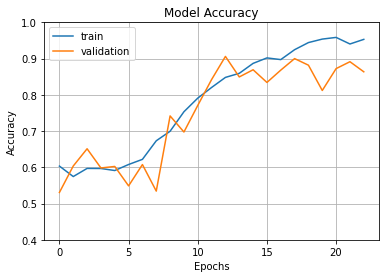

157/157 [==============================] - 2s 15ms/step - loss: 0.4646 - accuracy: 0.8636


[0.4646405279636383, 0.8636000156402588]

In [12]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
model.evaluate(val_ds)

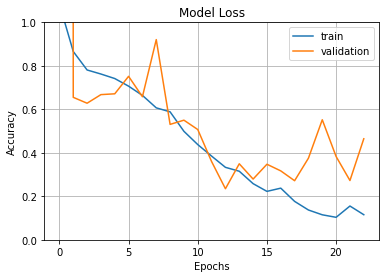

: 

In [13]:
fig1 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()